In [89]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
wine = pd.read_csv('data/wine.data')
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [91]:
wine.describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


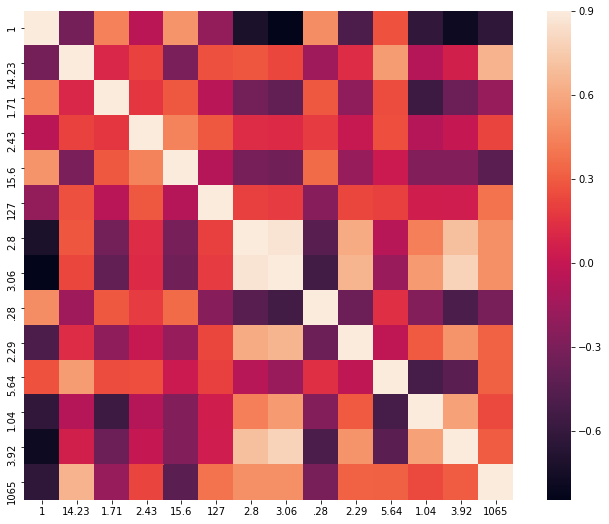

In [92]:
corr = wine.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True)
plt.show()

### Primeira execução sem a utilização de PCA

In [93]:
columns = wine.columns
x = wine[columns[1:columns.size]]
y = wine[columns[0]]


x = scale(x)

model = MLPClassifier(max_iter=1000) 
scores = cross_val_score(model, x, y, cv=10)
print('Sem PCA:')
print(scores.mean(), scores.std())

Sem PCA:
0.983625730994152 0.025023500462379746


### Principal Component Analysis


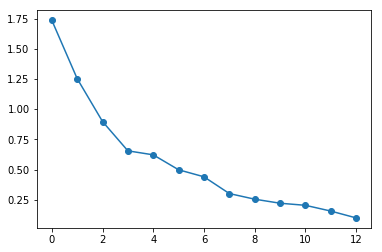

array([4.6777992 , 2.50136634, 1.45332981, 0.92444413, 0.86173674,
       0.64484771, 0.55198181, 0.35073883, 0.28918002, 0.24680867,
       0.22544019, 0.16837682, 0.10394972])

In [49]:
# Calculando matriz de covariancia
data = wine.drop(columns='1')
data_std = data.std()

# Padronização dos dados
data = (data - data.mean())/data_std

cov = data.cov()
# Calculando autovalores e autovetores
va, ve = np.linalg.eig(cov)
# Ordenando autovalores e autovetores
sort_idx = np.argsort(va)[::-1]
einvals = va[sort_idx]
einvecs = ve[sort_idx]


plt.plot(np.log1p(einvals), '-o')
plt.show()
einvals

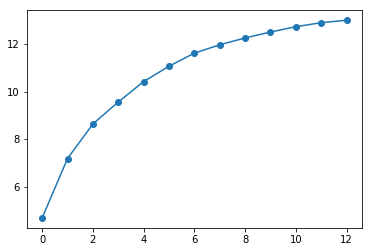

In [50]:
cum_einv = np.cumsum(einvals)
plt.plot(cum_einv, '-o')
plt.show()

In [51]:
EVR = einvals/einvals.sum()
EVR

array([0.35983071, 0.1924128 , 0.1117946 , 0.07111109, 0.06628744,
       0.04960367, 0.04246014, 0.02697991, 0.02224462, 0.01898528,
       0.01734155, 0.01295206, 0.00799613])

In [52]:
columns = wine.columns
x = wine[columns[1:columns.size]]
y = wine[columns[0]]

X = scale(x)

pca = PCA(n_components = columns.size-1)
pca.fit(X)
pca.explained_variance_ratio_

array([0.35983071, 0.1924128 , 0.1117946 , 0.07111109, 0.06628744,
       0.04960367, 0.04246014, 0.02697991, 0.02224462, 0.01898528,
       0.01734155, 0.01295206, 0.00799613])

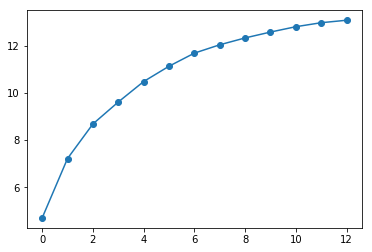

In [53]:
plt.plot(np.cumsum(pca.explained_variance_), '-o')

In [78]:
NC = 9 # Numero de componentes

columns = wine.columns
x = wine[columns[1:columns.size]]
y = wine[columns[0]]

X = scale(x)
X = np.dot(X, einvecs)

X = X[:, sort_idx[1:NC+1]]

model = MLPClassifier(max_iter=1000) 
scores = cross_val_score(model, X, y, cv=10)
print('PCA cortando valores com %d componentes:' % NC)
print(scores.mean(), scores.std())

PCA cortando valores com 9 componentes:
0.956140350877193 0.06884707673806521


In [79]:
columns = wine.columns
x = wine[columns[1:columns.size-1]]
y = wine[columns[0]]

X_sk = scale(x)
pca = PCA(n_components = NC)
X_sk = pca.fit_transform(X_sk)

model = MLPClassifier(max_iter=1000) 
scores = cross_val_score(model, X_sk, y, cv=10)
print('SKLearn PCA cortando valores com %d componentes:' % NC)
print(scores.mean(), scores.std())

SKLearn PCA cortando valores com 9 componentes:
0.9718201754385966 0.028274665760425068


In [87]:
X_sk[0]

array([-2.04403323, -1.94216218, -1.03519178, -0.97414049, -0.47483276,
       -0.32630766, -0.21152467,  0.12539496,  0.16790879])

In [86]:
X[0]

array([ 0.39617377,  0.79410088, -1.07134329, -2.47390474, -0.7681372 ,
        1.13812501, -0.63813415,  0.54834374,  0.04648042])